# Profit estimation of companies 
The dataset you described consists of sample data for 1000 startup companies, focusing on their operating costs and profits.

# Exploratory data analysis 

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('1000_Companies.csv')
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,New York,192261.83000
1,162597.70,151377.590,443898.5300,California,191792.06000
2,153441.51,101145.550,407934.5400,Florida,191050.39000
3,144372.41,118671.850,383199.6200,New York,182901.99000
4,142107.34,91391.770,366168.4200,Florida,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,California,95279.96251
996,134970.00,130390.080,329204.0228,California,164336.60550
997,100275.47,241926.310,227142.8200,California,413956.48000
998,128456.23,321652.140,281692.3200,California,333962.19000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        1000 non-null   float64
 1   Administration   1000 non-null   float64
 2   Marketing Spend  1000 non-null   float64
 3   State            1000 non-null   object 
 4   Profit           1000 non-null   float64
dtypes: float64(4), object(1)
memory usage: 39.2+ KB


In [4]:
df['State'].value_counts()

California    344
New York      334
Florida       322
Name: State, dtype: int64

In [5]:
df.shape

(1000, 5)

In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [7]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

# data visualization

<AxesSubplot:xlabel='Marketing Spend', ylabel='Profit'>

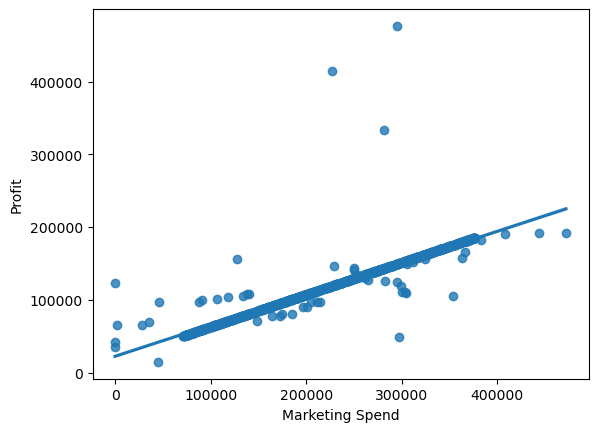

In [8]:
sns.regplot(data=df,x='Marketing Spend',y='Profit')  

<AxesSubplot:xlabel='R&D Spend', ylabel='Profit'>

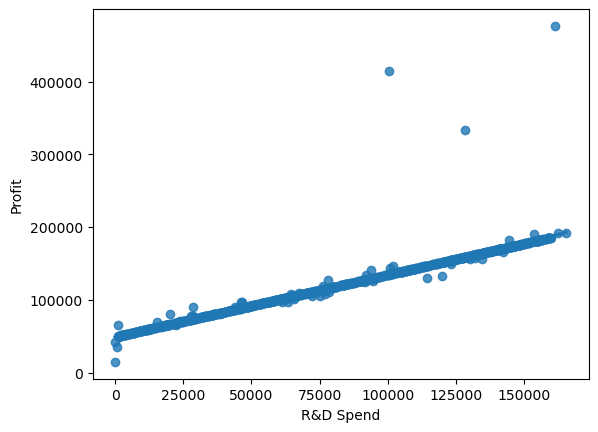

In [9]:
sns.regplot(data=df,x='R&D Spend',y='Profit')  

<AxesSubplot:xlabel='State', ylabel='count'>

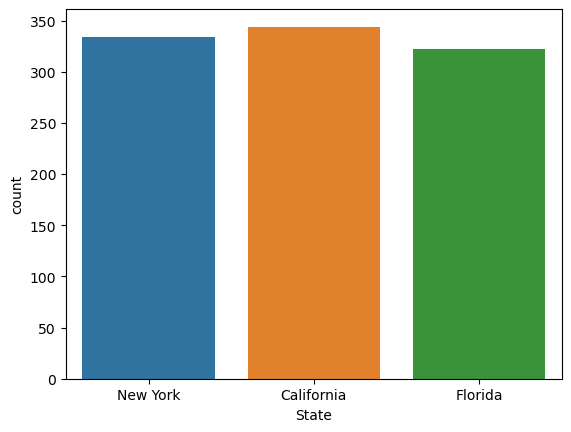

In [10]:
sns.countplot(x='State',data=df)

The three states (New York, California, Florida) have equal quantities in this study

# Estimating correlation coefficients
Our dataset is very small. So, we can compute the standard correlation coefficient between every pair of attributes. We can compute it using the df.corr() method as follows:

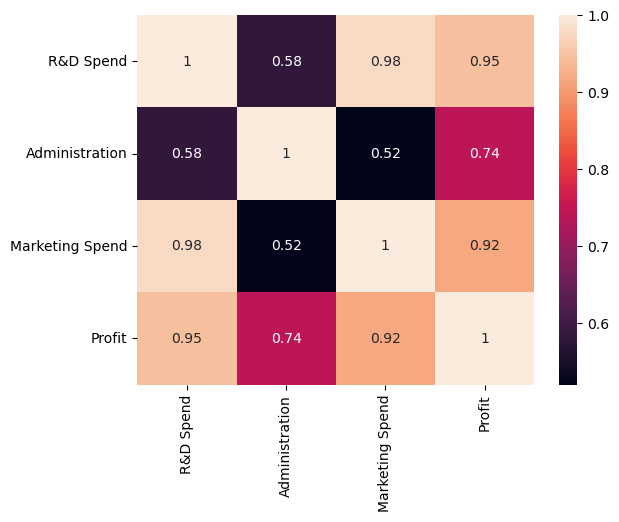

In [11]:
import seaborn as sns
sns.heatmap(df.corr(),annot=True)
plt.show()

In [12]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [13]:
#encoding data
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
one=OneHotEncoder()
df['State']=one.fit_transform(df[['State']]).toarray()
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,0.0,192261.83000
1,162597.70,151377.590,443898.5300,1.0,191792.06000
2,153441.51,101145.550,407934.5400,0.0,191050.39000
3,144372.41,118671.850,383199.6200,0.0,182901.99000
4,142107.34,91391.770,366168.4200,0.0,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,1.0,95279.96251
996,134970.00,130390.080,329204.0228,1.0,164336.60550
997,100275.47,241926.310,227142.8200,1.0,413956.48000
998,128456.23,321652.140,281692.3200,1.0,333962.19000


In [14]:
#scaling data
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
df[['R&D Spend','Administration','Marketing Spend']]=scale.fit_transform(df[['R&D Spend','Administration','Marketing Spend']])

# Splitting the dataset into the Training set and Test set

In [15]:
X=df.iloc[:,:-1]

In [16]:
y=df.iloc[:,4]

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22)

# Fit the Model & Predict , check the Accuracy

In [19]:
import numpy as np
from sklearn.linear_model import LinearRegression
Lin=LinearRegression()
Lin.fit(X_train,y_train)

LinearRegression()

In [20]:
y_pred=Lin.predict(X_test)
y_pred[:4]

array([ 51189.74661875, 181815.43409755,  57176.48612078, 109156.62978042])

In [21]:
y_train.shape

(800,)

In [22]:
df.columns[:4]

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State'], dtype='object')

In [23]:
#Calculating the coefficient
print(Lin.coef_)

[101709.20786262 204701.47390231  31673.82846347    567.22442654]


The feature that has a higher correlation with income is R&D Spend

In [24]:
#calculate intercept
print(Lin.intercept_)

-488.914097062996


In [25]:
y_test[:4]

866     51286.51978
191    181579.62250
732     57258.01646
657    109105.81410
Name: Profit, dtype: float64

# Evaluating model

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.9164744397742263

Linear Regression Model score is best with R2 score as 0.91

# Plot scatter Plot

In [27]:
X=df.loc[:,'R&D Spend']
y=df.iloc[:,4]

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=22)


In [28]:
Lin=LinearRegression()
Lin.fit(X_train.values.reshape(-1,1),y_train)

LinearRegression()

In [29]:
y_pred=Lin.predict(X_test.values.reshape(-1,1))

In [30]:
r2_score(y_pred,y_test)

0.6447436484718589

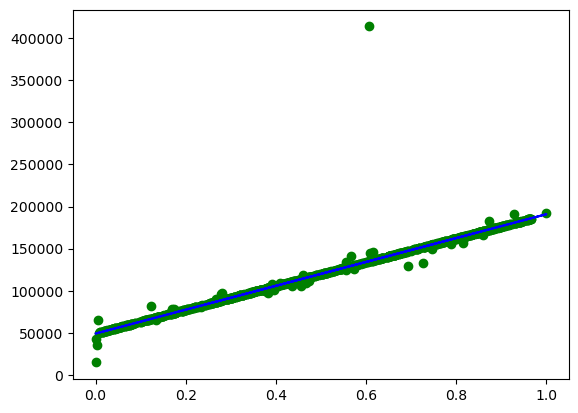

In [31]:
plt.scatter(X_train.values.reshape(-1,1),y_train,color='green')
plt.plot(X_train,Lin.predict(X_train.values.reshape(-1,1)),color='blue')

The scatter plot shows the same regression results graphically.